In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [2]:
file_list = glob("./data/*.csv")
file_list

['./data\\conversionRates.csv',
 './data\\freeformResponses.csv',
 './data\\multipleChoiceResponses.csv',
 './data\\schema.csv']

In [3]:
mca = pd.read_csv(file_list[2], encoding="cp437", low_memory=False)
mca.shape

(16716, 228)

In [4]:
pd.set_option("display.max_colwidth", None)

In [5]:
mca["BlogsPodcastsNewslettersSelect"].head()

0    Becoming a Data Scientist Podcast,Data Machina Newsletter,O'Reilly Data Newsletter,Partially Derivative Podcast,R Bloggers Blog Aggregator
1                                                                                 Becoming a Data Scientist Podcast,Siraj Raval YouTube Channel
2                                                                                       FastML Blog,No Free Hunch Blog,Talking Machines Podcast
3                                                                                                                                KDnuggets Blog
4                                                                  Data Machina Newsletter,Jack's Import AI Newsletter,O'Reilly Data Newsletter
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [6]:
pd.reset_option("display.max_colwidth")

In [7]:
media_series = mca["BlogsPodcastsNewslettersSelect"].str.split(",", expand=True).stack().reset_index(level=1, drop=True)
media_series.shape

(18218,)

In [8]:
media_count_series = media_series.value_counts().head(20)
media_count_series

KDnuggets Blog                                       2650
R Bloggers Blog Aggregator                           2046
O'Reilly Data Newsletter                             1604
Becoming a Data Scientist Podcast                    1299
Other (Separate different answers with semicolon)    1296
No Free Hunch Blog                                   1238
Siraj Raval YouTube Channel                          1040
FastML Blog                                           729
Statistical Modeling                                  662
 and Social Science Blog (Andrew Gelman)              662
 Causal Inference                                     662
Data Machina Newsletter                               660
The Data Skeptic Podcast                              567
Talking Machines Podcast                              473
Data Elixir Newsletter                                447
FlowingData Blog                                      392
Linear Digressions Podcast                            369
Data Stories P

In [9]:
sns.set(font_scale=0.8, font="Malgun Gothic")

<Axes: >

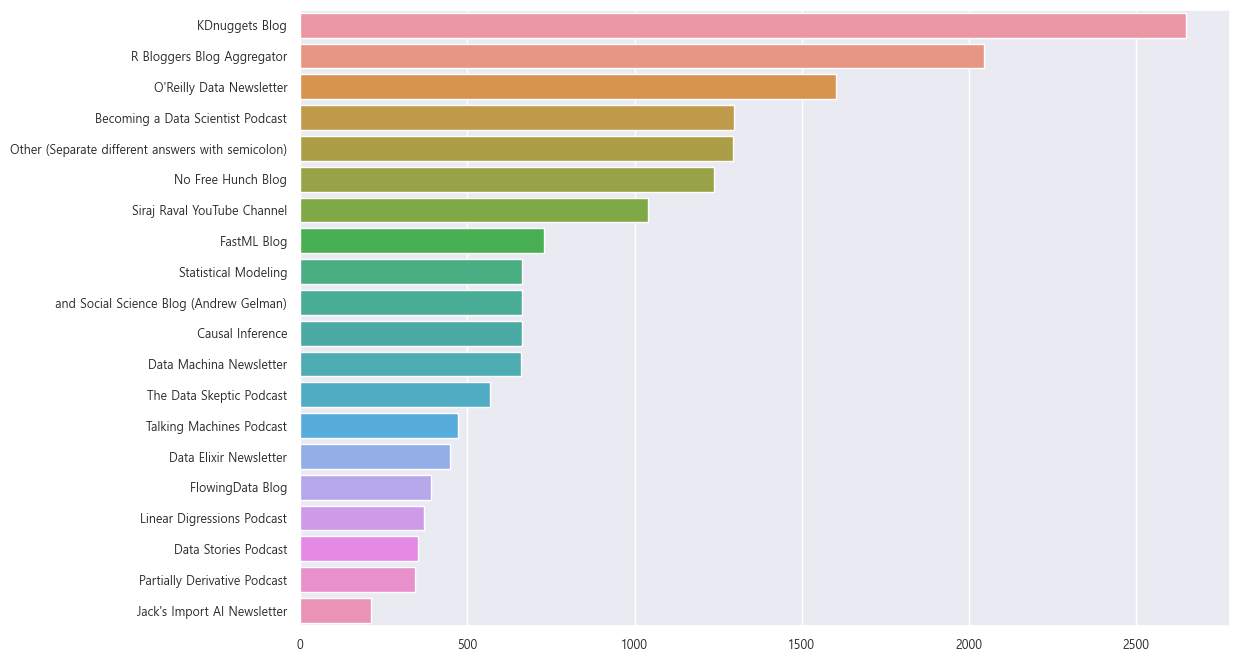

In [10]:
plt.figure(figsize=(12, 8))
sns.barplot(y=media_count_series.index, x=media_count_series.values)

In [11]:
media_origin_series = mca["BlogsPodcastsNewslettersSelect"].value_counts().head(20)
media_origin_series

Other (Separate different answers with semicolon)                                              608
KDnuggets Blog                                                                                 498
R Bloggers Blog Aggregator                                                                     414
O'Reilly Data Newsletter                                                                       234
Becoming a Data Scientist Podcast                                                              223
No Free Hunch Blog                                                                             208
KDnuggets Blog,R Bloggers Blog Aggregator                                                      204
Siraj Raval YouTube Channel                                                                    199
KDnuggets Blog,O'Reilly Data Newsletter                                                        125
KDnuggets Blog,O'Reilly Data Newsletter,R Bloggers Blog Aggregator                             114
KDnuggets 

<Axes: >

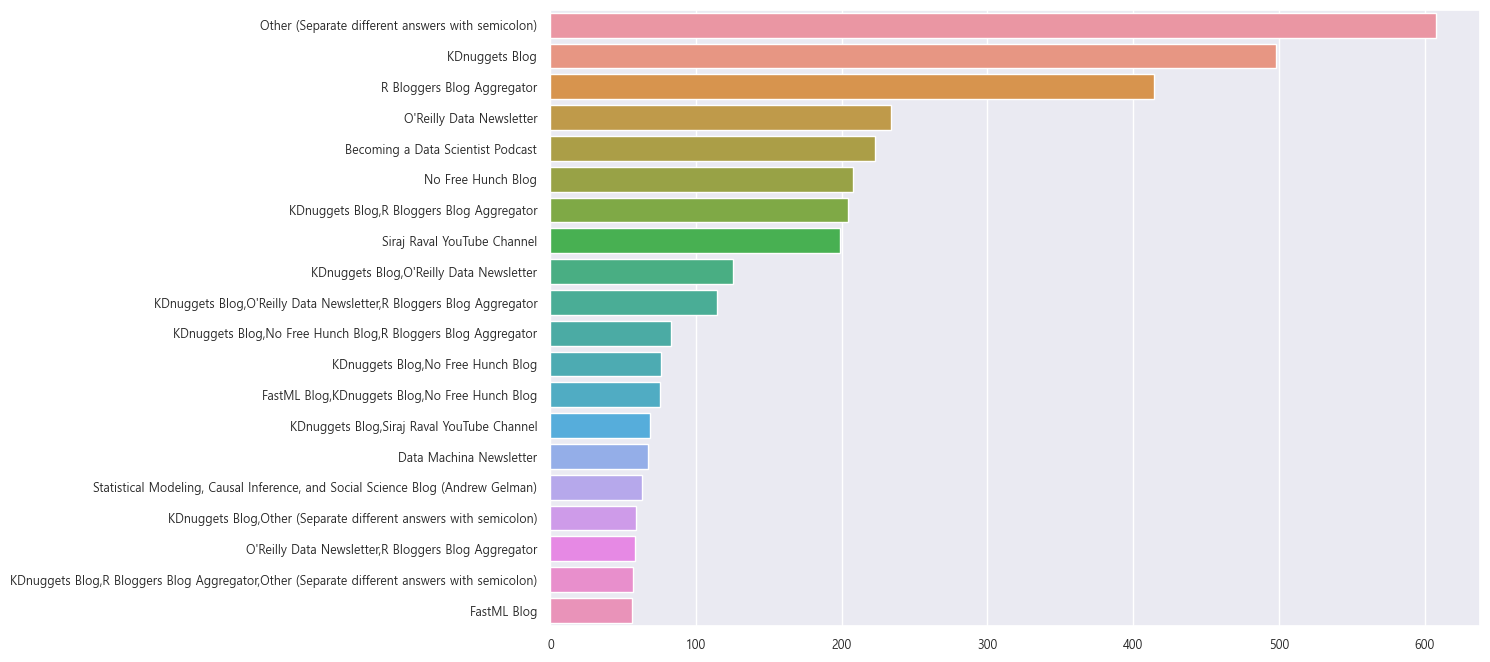

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x=media_origin_series.values, y=media_origin_series.index)

In [13]:
course_series = mca["CoursePlatformSelect"].str.split(",", expand=True).stack().reset_index(level=1, drop=True)
course_series.head()

2     Coursera
2          edX
7     Coursera
10    Coursera
12    Coursera
dtype: object

In [14]:
course_count_series = course_series.value_counts()
course_count_series

Coursera    1725
Udacity      805
edX          710
DataCamp     638
Other        356
dtype: int64

<Axes: title={'center': 'Most popular course platforms'}>

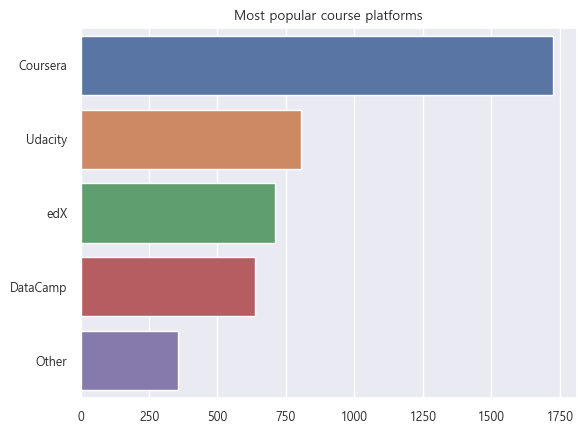

In [15]:
plt.title("Most popular course platforms")
sns.barplot(y=course_count_series.index, x=course_count_series.values)

In [16]:
skill_list = list(mca.columns[mca.columns.str.contains("^JobSkillImportance[^Other]", regex=True)])
skill_list

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [17]:
mca["JobSkillImportanceBigData"].value_counts()

Nice to have    2271
Necessary       1503
Unnecessary      182
Name: JobSkillImportanceBigData, dtype: int64

In [18]:
skill_rate_dict = {}
for skill in skill_list:
    temp = mca[skill].value_counts(normalize=True)
    skill_rate_dict[skill[len("JobSkillImportance"):]] = temp
skill_rate_dict


{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'Stats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'KaggleRanking': Nice to have    0.677

In [19]:
skill_rate_df = pd.DataFrame(skill_rate_dict).transpose()
skill_rate_df.head()

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792


<Axes: >

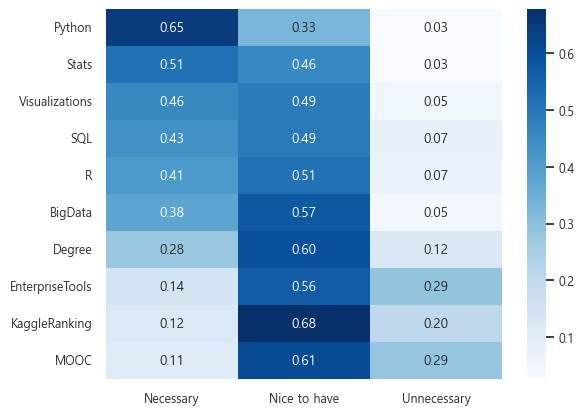

In [20]:
sns.heatmap(skill_rate_df.sort_values("Necessary", ascending=False), annot=True, fmt=".2f", cmap="Blues")

<Axes: >

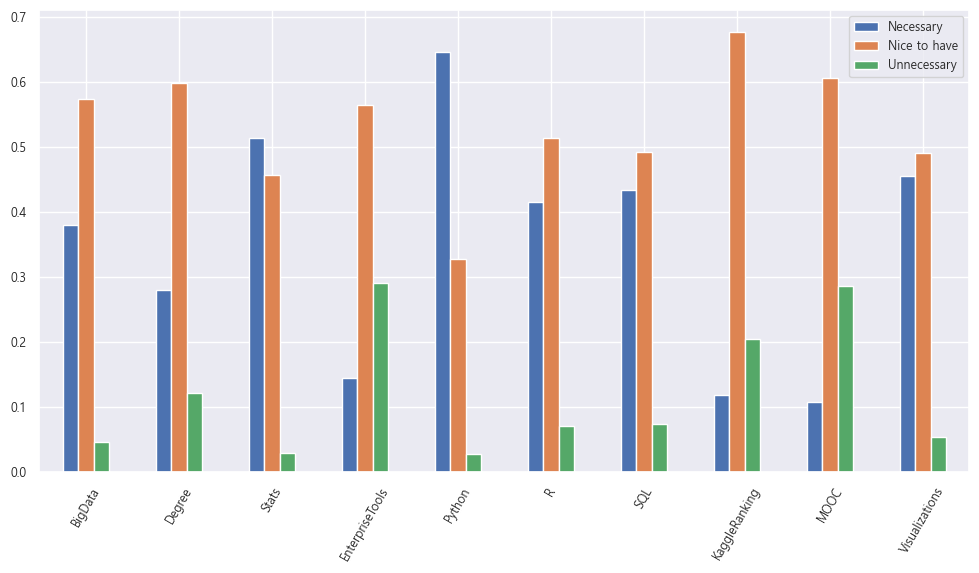

In [21]:
skill_rate_plot = skill_rate_df.plot.bar(figsize=(12, 6))
plt.xticks(rotation=60)
skill_rate_plot

In [22]:
mca["CompensationAmount"].shape

(16716,)

In [23]:
mca.replace({"CompensationAmount": {"[,-]": ""}}, regex=True, inplace=True)
mca["CompensationAmount"].str.contains("[,-]", regex=True, na=False).unique()

array([False])

In [24]:
currency_rate_df = pd.read_csv(file_list[0])
currency_rate_df.drop("Unnamed: 0", axis=1, inplace=True)
currency_rate_df

,originCountry,exchangeRate
0,USD,1.000000
1,EUR,1.195826
2,INR,0.015620
3,GBP,1.324188
4,BRL,0.321350
...,...,...
81,SVC,0.114124
82,SZL,0.077002
83,UYU,0.034642
84,XAF,0.001823


In [74]:
salary_df = mca[["CompensationAmount", "CompensationCurrency", "GenderSelect", "Country", "Age", "CurrentJobTitleSelect"]].dropna().copy()
salary_df.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,Age,CurrentJobTitleSelect
3,250000,USD,Male,United States,56.0,Operations Research Practitioner
8,80000,AUD,Female,Australia,43.0,Business Analyst
9,1200000,RUB,Male,Russia,33.0,Software Developer/Software Engineer
11,95000,INR,Male,India,27.0,Data Scientist
14,1100000,TWD,Male,Taiwan,26.0,Software Developer/Software Engineer


In [75]:
salary_df = salary_df.merge(currency_rate_df, "left", left_on="CompensationCurrency", right_on="originCountry")
salary_df.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,Age,CurrentJobTitleSelect,originCountry,exchangeRate
0,250000,USD,Male,United States,56.0,Operations Research Practitioner,USD,1.000000
1,80000,AUD,Female,Australia,43.0,Business Analyst,AUD,0.802310
2,1200000,RUB,Male,Russia,33.0,Software Developer/Software Engineer,RUB,0.017402
3,95000,INR,Male,India,27.0,Data Scientist,INR,0.015620
4,1100000,TWD,Male,Taiwan,26.0,Software Developer/Software Engineer,TWD,0.033304


In [76]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4344 entries, 0 to 4343
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CompensationAmount     4344 non-null   object 
 1   CompensationCurrency   4344 non-null   object 
 2   GenderSelect           4344 non-null   object 
 3   Country                4344 non-null   object 
 4   Age                    4344 non-null   float64
 5   CurrentJobTitleSelect  4344 non-null   object 
 6   originCountry          4343 non-null   object 
 7   exchangeRate           4343 non-null   float64
dtypes: float64(2), object(6)
memory usage: 305.4+ KB


In [77]:
salary_df.isnull().sum()

CompensationAmount       0
CompensationCurrency     0
GenderSelect             0
Country                  0
Age                      0
CurrentJobTitleSelect    0
originCountry            1
exchangeRate             1
dtype: int64

In [78]:
salary_df["CompensationAmount"].replace({"": 0}, inplace=True)

In [79]:
salary_df["salary"] = pd.to_numeric(salary_df["CompensationAmount"]) * salary_df["exchangeRate"]
salary_df.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,Age,CurrentJobTitleSelect,originCountry,exchangeRate,salary
0,250000,USD,Male,United States,56.0,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,43.0,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,33.0,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,27.0,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,26.0,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [80]:
# salary_df["salary"].describe()
print(f"Maximum Salary is USD $ {salary_df['salary'].max():.0f}",
      f"Minimum Salary is USD $ {salary_df['salary'].min():.0f}",
      f"Median Salary is USD $ {salary_df['salary'].median():.0f}", sep="\n")

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812


Text(0.5, 1.0, 'Salary Distribution')

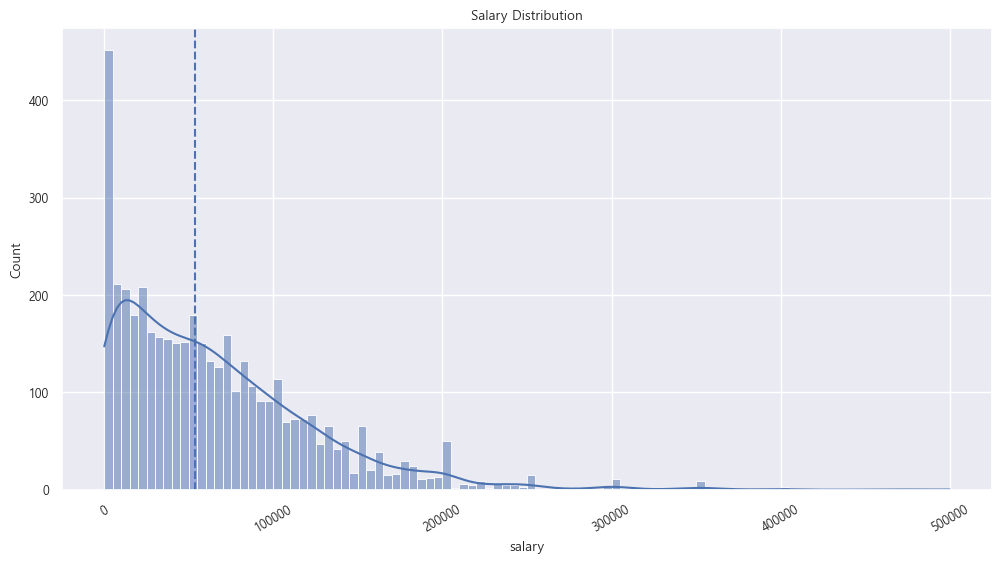

In [81]:
plt.figure(figsize=(12, 6))
salary_df = salary_df[salary_df["salary"] <= 500000]
sns.histplot(salary_df, 
             x="salary", 
             kde=True, 
             bins=100)
plt.axvline(salary_df["salary"].median(), linestyle="dashed")
plt.xticks(rotation= 30)
plt.title("Salary Distribution")

In [82]:
sal_cnt_df = salary_df \
    .groupby(["Country"])["salary"] \
    .median() \
    .sort_values(ascending=False) \
    [:30] \
    .to_frame()
sal_cnt_df.head()

,salary
Country,
United States,107000.00
Switzerland,104338.20
Australia,93067.96
Norway,87875.40
Denmark,80365.00


Text(0.5, 1.0, 'Highest Salary Paying Countries')

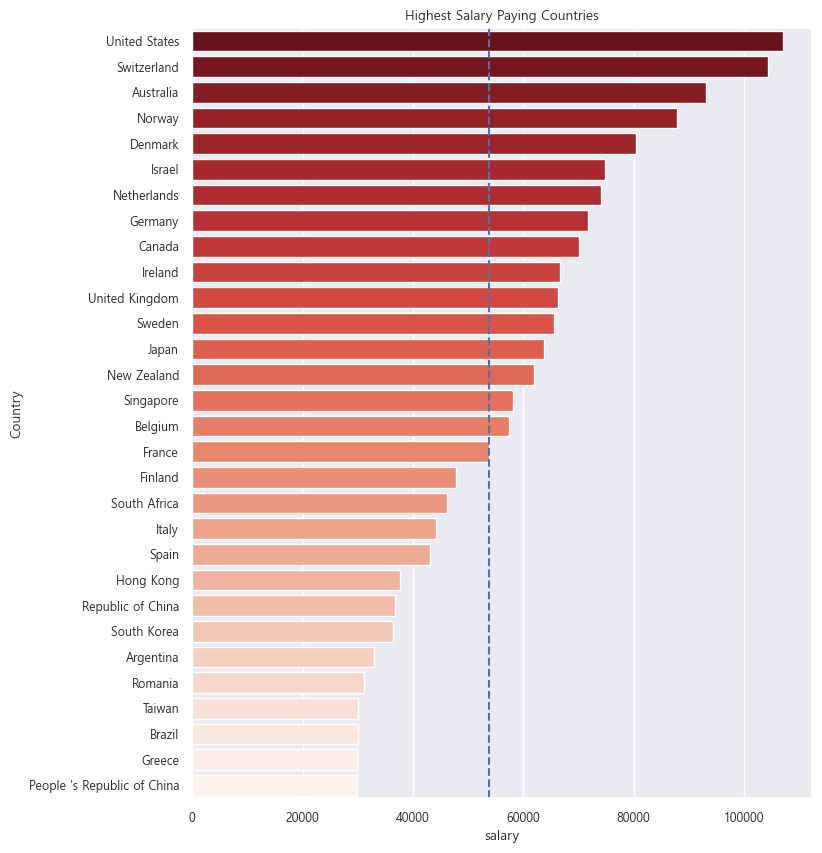

In [83]:
plt.figure(figsize=(8, 10))
sns.barplot(sal_cnt_df, 
            y=sal_cnt_df.index, 
            x="salary",
            palette="Reds_r")
plt.axvline(salary_df["salary"].median(), linestyle="dashed")
plt.title("Highest Salary Paying Countries")

<Axes: xlabel='salary', ylabel='GenderSelect'>

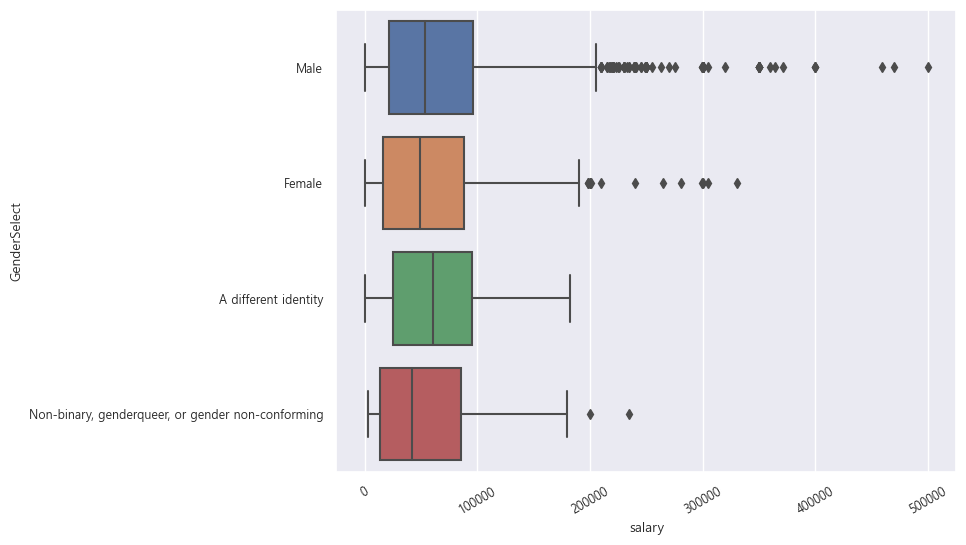

In [84]:
plt.figure(figsize=(8, 6))
plt.xticks(rotation=30)
sns.boxplot(salary_df,
            x="salary",
            y="GenderSelect")

In [85]:
salary_df.columns

Index(['CompensationAmount', 'CompensationCurrency', 'GenderSelect', 'Country',
       'Age', 'CurrentJobTitleSelect', 'originCountry', 'exchangeRate',
       'salary'],
      dtype='object')

In [86]:
salary_korea_df = salary_df[salary_df["Country"] == "South Korea"].copy()
salary_korea_df

,CompensationAmount,CompensationCurrency,GenderSelect,Country,Age,CurrentJobTitleSelect,originCountry,exchangeRate,salary
85,40000000,KRW,Male,South Korea,27.0,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,53.0,Researcher,USD,1.000000,80000.000
313,60000,USD,Male,South Korea,46.0,Business Analyst,USD,1.000000,60000.000
332,60000000,KRW,Male,South Korea,46.0,Researcher,KRW,0.000886,53160.000
478,30000,KRW,Female,South Korea,29.0,Data Analyst,KRW,0.000886,26.580
561,50000000,KRW,Male,South Korea,48.0,Researcher,KRW,0.000886,44300.000
768,42000000,KRW,Male,South Korea,32.0,Software Developer/Software Engineer,KRW,0.000886,37212.000
797,1000,KRW,Male,South Korea,29.0,Machine Learning Engineer,KRW,0.000886,0.886
1057,75000000,KRW,Male,South Korea,36.0,Scientist/Researcher,KRW,0.000886,66450.000
1355,30000000,KRW,Male,South Korea,26.0,Statistician,KRW,0.000886,26580.000


In [87]:
salary_korea_df["Age"].describe()

count    26.000000
mean     36.653846
std      10.303174
min      24.000000
25%      27.000000
50%      34.000000
75%      46.000000
max      57.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

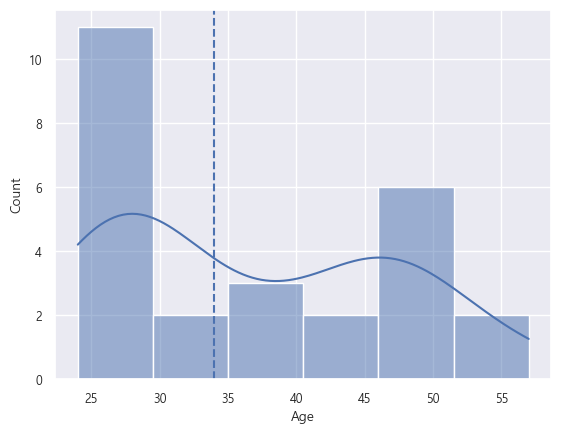

In [102]:
plt.axvline(salary_korea_df["Age"].median(), linestyle="dashed")
sns.histplot(salary_korea_df, 
             x="Age", 
             kde=True)

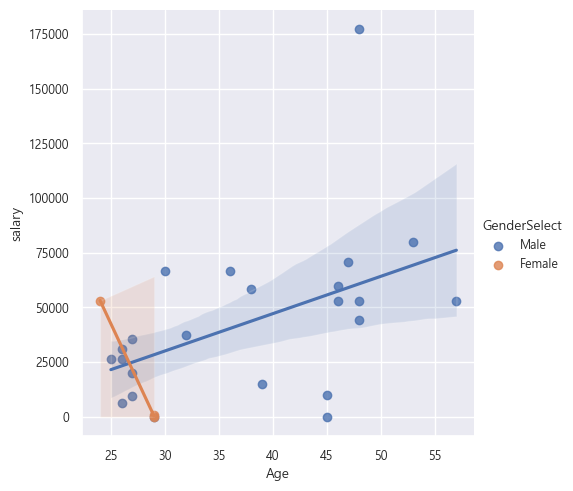

In [93]:
sns.lmplot(salary_korea_df,
            x="Age",
            y="salary",
            hue="GenderSelect"
            )

<Axes: xlabel='salary', ylabel='GenderSelect'>

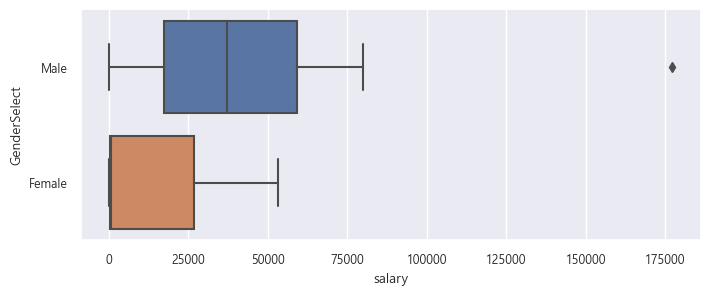

In [94]:
plt.figure(figsize=(8, 3))
sns.boxplot(salary_korea_df, 
            y="GenderSelect", 
            x="salary")

In [95]:
salary_korea_df["GenderSelect"].value_counts()

Male      23
Female     3
Name: GenderSelect, dtype: int64

In [97]:
salary_korea_df[salary_korea_df["GenderSelect"].str.contains("Female")]

,CompensationAmount,CompensationCurrency,GenderSelect,Country,Age,CurrentJobTitleSelect,originCountry,exchangeRate,salary
478,30000,KRW,Female,South Korea,29.0,Data Analyst,KRW,0.000886,26.58
2891,800000,KRW,Female,South Korea,29.0,Researcher,KRW,0.000886,708.80
4046,60000000,KRW,Female,South Korea,24.0,Researcher,KRW,0.000886,53160.00


In [99]:
salary_korea_df[salary_korea_df["GenderSelect"].str.contains("Male")]["salary"].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: salary, dtype: float64

In [98]:
salary_korea_df[salary_korea_df["GenderSelect"].str.contains("Male")]

,CompensationAmount,CompensationCurrency,GenderSelect,Country,Age,CurrentJobTitleSelect,originCountry,exchangeRate,salary
85,40000000,KRW,Male,South Korea,27.0,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,53.0,Researcher,USD,1.000000,80000.000
313,60000,USD,Male,South Korea,46.0,Business Analyst,USD,1.000000,60000.000
332,60000000,KRW,Male,South Korea,46.0,Researcher,KRW,0.000886,53160.000
561,50000000,KRW,Male,South Korea,48.0,Researcher,KRW,0.000886,44300.000
768,42000000,KRW,Male,South Korea,32.0,Software Developer/Software Engineer,KRW,0.000886,37212.000
797,1000,KRW,Male,South Korea,29.0,Machine Learning Engineer,KRW,0.000886,0.886
1057,75000000,KRW,Male,South Korea,36.0,Scientist/Researcher,KRW,0.000886,66450.000
1355,30000000,KRW,Male,South Korea,26.0,Statistician,KRW,0.000886,26580.000
1563,90000,SGD,Male,South Korea,30.0,Computer Scientist,SGD,0.742589,66833.010


In [104]:
pd.set_option("display.max_colwidth", None)

In [131]:
dataset_series = mca["PublicDatasetsSelect"].str.split(",", expand=True).stack().reset_index(level=1, drop=True)
dataset_series.name = "dataset"
dataset_series.head()

0    Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.)
0                                 University/Non-profit research group websites
0                                                                         Other
1    Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.)
2    Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.)
Name: dataset, dtype: object

In [140]:
dataset_count_series =dataset_series.value_counts()
dataset_count_series

Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.)    6843
Google Search                                                                 3600
University/Non-profit research group websites                                 2873
I collect my own data (e.g. web-scraping)                                     2560
GitHub                                                                        2400
Government website                                                            2079
Other                                                                          399
Name: dataset, dtype: int64

In [141]:
dataset_count_series.index

Index(['Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.)',
       'Google Search', 'University/Non-profit research group websites',
       'I collect my own data (e.g. web-scraping)', 'GitHub',
       'Government website', 'Other'],
      dtype='object')

In [144]:
dataset_count_series.values

array([6843, 3600, 2873, 2560, 2400, 2079,  399], dtype=int64)

<Axes: >

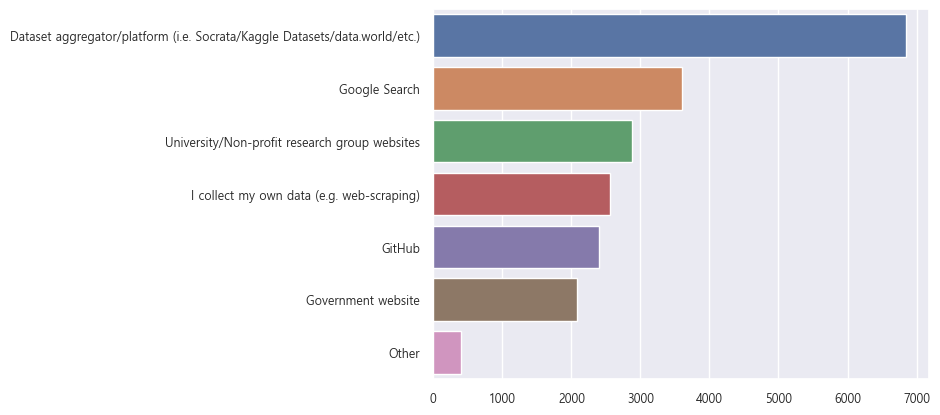

In [146]:
sns.barplot(y=dataset_count_series.index,
            x=dataset_count_series.values)

In [147]:
file_list

['./data\\conversionRates.csv',
 './data\\freeformResponses.csv',
 './data\\multipleChoiceResponses.csv',
 './data\\schema.csv']

In [150]:
# ffa
ffa = pd.read_csv(file_list[1], low_memory=False)
ffa.shape

(16716, 62)

In [153]:
mcq = pd.read_csv(file_list[3])

In [154]:
mcq.columns

Index(['Column', 'Question', 'Asked'], dtype='object')

In [172]:
mcq.loc[mcq["Column"].str.contains("PersonalProjectsChallengeFreeForm"), "Question"]

22    What is your biggest challenge with the public datasets you find for personal projects?
Name: Question, dtype: object

In [178]:
ffa["PersonalProjectsChallengeFreeForm"].notnull().sum()

3502

In [180]:
ffa["PersonalProjectsChallengeFreeForm"].value_counts(dropna=True).head(15)

None                     23
Cleaning the data        20
Cleaning                 20
Dirty data               16
Data Cleaning            14
none                     13
dirty data               10
Data cleaning            10
-                         9
Size                      9
cleaning                  8
Incomplete data           8
Missing data              8
Lack of documentation     7
data quality              6
Name: PersonalProjectsChallengeFreeForm, dtype: int64

In [182]:
from wordcloud import WordCloud, STOPWORDS